## Load the Data

In [1]:
import pandas as pd
new_df=pd.read_csv('Earnings_Call_Transcript.csv')

In [2]:
new_df.head(5)

,Unnamed: 0,sentiment,text
0,0,positive,thank good afternoon everyone welcome nvidias ...
1,1,positive,look past q1 expect channel inventory correcti...
2,3,negative,china game weakness slow economic environment ...
3,4,negative,dont know could tear apart tease apart harlan ...
4,5,positive,thank ill turn call back jenhsun close remark


#### Convert output variables as Numerical Outputs

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
Y = le.fit_transform(new_df['sentiment'])

## Bag of Words Using Count Vectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [7]:
vectorizer.fit(new_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### Converting it to an array of integers

In [8]:
a=vectorizer.transform(new_df['text']).toarray()

In [9]:
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Creating Train and Test Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(a, Y, test_size=0.2, random_state=1000)

### Creating a  Logistic Regression Model:

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [14]:
print("Accuracy:", score)

Accuracy: 0.8098159509202454


Obtained an Accuracy of 81%

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  5,  24],
       [  7, 127]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.42      0.17      0.24        29
          1       0.84      0.95      0.89       134

avg / total       0.77      0.81      0.78       163



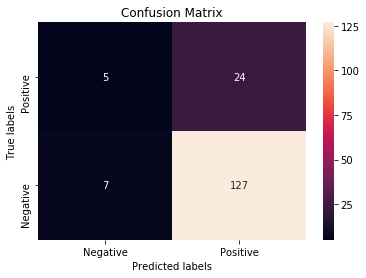

In [28]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

### Creating a Keras Fully connected Model

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [38]:
input_dim = X_train.shape[1]

In [39]:
model_bow = Sequential()
model_bow.add(Dense(32, input_dim=input_dim, activation='relu'))
model_bow.add(Dropout(0.5))
model_bow.add(Dense(32,activation='relu'))
model_bow.add(Dropout(0.5))
model_bow.add(Dense(1, activation='sigmoid'))

In [40]:
model_bow.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                128032    
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 129,121
Trainable params: 129,121
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_bow = model_bow.fit(X_train, y_train,epochs=5,verbose=False,validation_data=(X_test, y_test),batch_size=10)

In [42]:
loss, accuracy = model_bow.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_bow.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

648/648 [==============================] - 0s 54us/step
Training Accuracy: 0.8673
163/163 [==============================] - 0s 61us/step
Testing Accuracy:  0.8282


Test Loss:  0.4681244474247189
Test Accuracy 0.8282208592613782
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


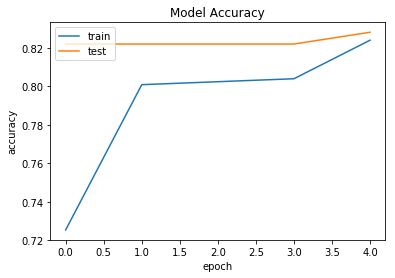

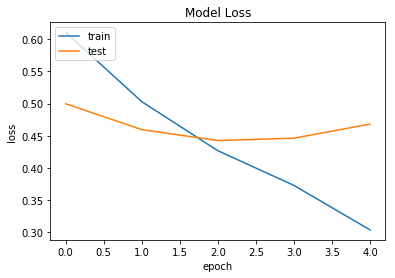

In [43]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_bow.evaluate(X_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bow.history.keys())
# summarize history for accuracy
plt.plot(history_bow.history['acc'])
plt.plot(history_bow.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bow.history['loss'])
plt.plot(history_bow.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred_bow = model_bow.predict_classes(X_test)
y_pred_bow

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_bow)

array([[  1,  28],
       [  0, 134]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_bow))

             precision    recall  f1-score   support

          0       1.00      0.03      0.07        29
          1       0.83      1.00      0.91       134

avg / total       0.86      0.83      0.76       163



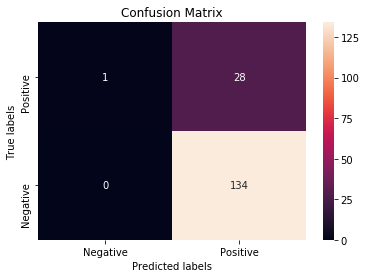

In [47]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_bow), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

## LSTM

In [48]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [49]:
import nltk
import string
import numpy as np
import pandas as pd

In [50]:
from sklearn.manifold import TSNE

In [110]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(new_df['text'])

In [111]:
sequences = tokenizer.texts_to_sequences(new_df['text'])
data = pad_sequences(sequences, maxlen=50)

In [112]:
model_lstm = Sequential()
model_lstm.add(Embedding(20000, 100, input_length=50))
model_lstm.add(LSTM(100,activation='relu', dropout=0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
history_lstm=model_lstm.fit(data, np.array(Y), validation_split=0.2, epochs=4)

Train on 648 samples, validate on 163 samples
Epoch 1/4
648/648 [==============================] - 5s 8ms/step - loss: 0.6542 - acc: 0.7608 - val_loss: 0.5946 - val_acc: 0.7485
Epoch 2/4
648/648 [==============================] - 2s 3ms/step - loss: 0.5361 - acc: 0.8210 - val_loss: 0.5504 - val_acc: 0.7485
Epoch 3/4
648/648 [==============================] - 2s 3ms/step - loss: 0.4030 - acc: 0.8210 - val_loss: 0.5443 - val_acc: 0.7485
Epoch 4/4
648/648 [==============================] - 2s 3ms/step - loss: 0.3345 - acc: 0.8210 - val_loss: 0.5319 - val_acc: 0.7485


Test Loss:  0.4681244474247189
Test Accuracy 0.8282208592613782
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


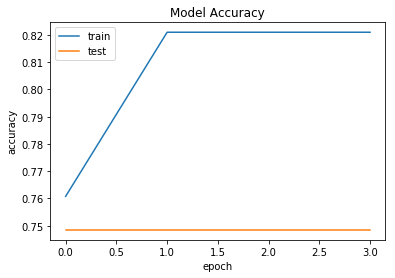

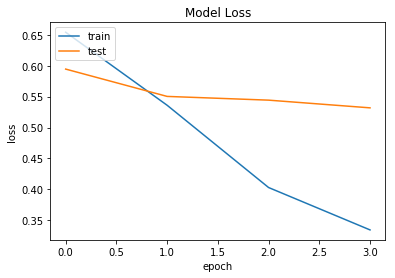

In [114]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

#score = model_lstm.evaluate(X_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm.history.keys())
# summarize history for accuracy
plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Glove

In [92]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

In [115]:
MAX_SEQUENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [116]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = Y[indices]
nb_validation_samples = int(0.2 * data.shape[0])

In [117]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [103]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [121]:
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

#### Model 1

In [127]:
from keras.layers import Embedding

embedding_layer = Embedding(num_words,
                            100,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=50,
                            trainable=False)

In [123]:
sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu',data_format='channels_first')(x)
x = MaxPooling1D(35)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(1, activation='softmax')(x)

model_glove = Model(sequence_input, preds)
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# happy learning!
history_glove=model_glove.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Train on 649 samples, validate on 162 samples
Epoch 1/10
649/649 [==============================] - 4s 6ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 2/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 3/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 4/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 5/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 6/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 7/10
649/649 [==============================] - 1s 1ms/step - loss: 2.9477 - acc: 0.8151 - val_loss: 3.6412 - val_acc: 0.7716
Epoch 8/10
649/649 [==========

#### Model 2

In [129]:
from keras.optimizers import adam
sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(32, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
#x = Conv1D(64, 5, activation='relu',data_format='channels_first')(x)
#x = MaxPooling1D(5)(x)  # global max pooling
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model_glove1 = Model(sequence_input, preds)
model_glove1.compile(loss='binary_crossentropy',
              optimizer=adam(lr=0.00001),
              metrics=['accuracy'])

# happy learning!
history_glove1=model_glove1.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Train on 649 samples, validate on 162 samples
Epoch 1/10
649/649 [==============================] - 3s 5ms/step - loss: 0.5295 - acc: 0.8136 - val_loss: 0.5935 - val_acc: 0.7778
Epoch 2/10
649/649 [==============================] - 0s 413us/step - loss: 0.5260 - acc: 0.8136 - val_loss: 0.5919 - val_acc: 0.7778
Epoch 3/10
649/649 [==============================] - 0s 421us/step - loss: 0.5235 - acc: 0.8136 - val_loss: 0.5905 - val_acc: 0.7778
Epoch 4/10
649/649 [==============================] - 0s 418us/step - loss: 0.5209 - acc: 0.8151 - val_loss: 0.5892 - val_acc: 0.7778
Epoch 5/10
649/649 [==============================] - 0s 438us/step - loss: 0.5185 - acc: 0.8151 - val_loss: 0.5884 - val_acc: 0.7778
Epoch 6/10
649/649 [==============================] - 0s 421us/step - loss: 0.5161 - acc: 0.8151 - val_loss: 0.5876 - val_acc: 0.7778
Epoch 7/10
649/649 [==============================] - 0s 433us/step - loss: 0.5139 - acc: 0.8151 - val_loss: 0.5866 - val_acc: 0.7778
Epoch 8/10
649/649

#### Model 3 with Trainable = True

In [130]:
from keras.layers import Embedding

embedding_layer_new = Embedding(num_words,
                            100,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=50,
                            trainable=True)

In [131]:
from keras.optimizers import adam
sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer_new(sequence_input)
x = Conv1D(32, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
#x = Conv1D(64, 5, activation='relu',data_format='channels_first')(x)
#x = MaxPooling1D(5)(x)  # global max pooling
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model_glove2 = Model(sequence_input, preds)
model_glove2.compile(loss='binary_crossentropy',
              optimizer=adam(lr=0.00001),
              metrics=['accuracy'])

# happy learning!
history_glove2=model_glove2.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Train on 649 samples, validate on 162 samples
Epoch 1/10
649/649 [==============================] - 4s 6ms/step - loss: 0.5631 - acc: 0.7612 - val_loss: 0.5982 - val_acc: 0.7284
Epoch 2/10
649/649 [==============================] - 0s 621us/step - loss: 0.5491 - acc: 0.7735 - val_loss: 0.5926 - val_acc: 0.7407
Epoch 3/10
649/649 [==============================] - 0s 644us/step - loss: 0.5385 - acc: 0.7827 - val_loss: 0.5890 - val_acc: 0.7407
Epoch 4/10
649/649 [==============================] - 0s 619us/step - loss: 0.5301 - acc: 0.7874 - val_loss: 0.5866 - val_acc: 0.7469
Epoch 5/10
649/649 [==============================] - 0s 633us/step - loss: 0.5233 - acc: 0.7920 - val_loss: 0.5853 - val_acc: 0.7531
Epoch 6/10
649/649 [==============================] - 0s 621us/step - loss: 0.5184 - acc: 0.7951 - val_loss: 0.5843 - val_acc: 0.7469
Epoch 7/10
649/649 [==============================] - 0s 612us/step - loss: 0.5138 - acc: 0.7951 - val_loss: 0.5838 - val_acc: 0.7469
Epoch 8/10
649/649

#### Model 1 Plot

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


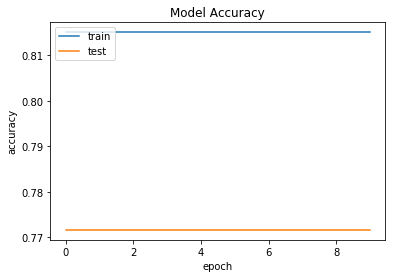

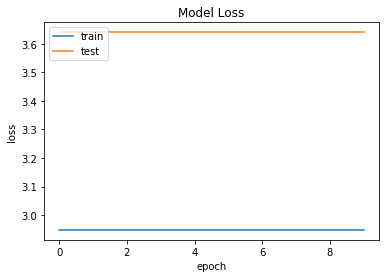

In [133]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

#score = model_lstm.evaluate(X_test, y_test, verbose=3)
#print('Test Loss: ', score[0])
#print('Test Accuracy', score[1])


# list all data in history
print(history_glove.history.keys())
# summarize history for accuracy
plt.plot(history_glove.history['acc'])
plt.plot(history_glove.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_glove.history['loss'])
plt.plot(history_glove.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 2 Plot

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


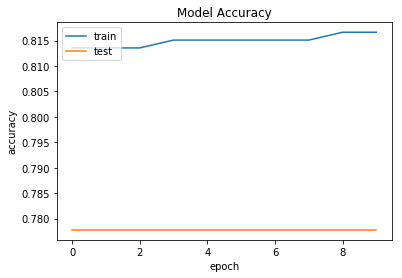

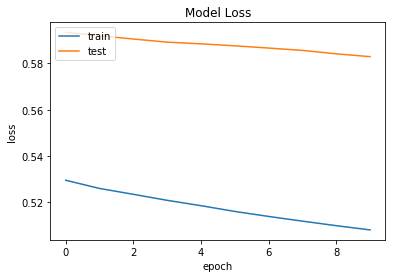

In [134]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

#score = model_lstm.evaluate(X_test, y_test, verbose=3)
#print('Test Loss: ', score[0])
#print('Test Accuracy', score[1])


# list all data in history
print(history_glove.history.keys())
# summarize history for accuracy
plt.plot(history_glove1.history['acc'])
plt.plot(history_glove1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_glove1.history['loss'])
plt.plot(history_glove1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 3 Trainable True Plot

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


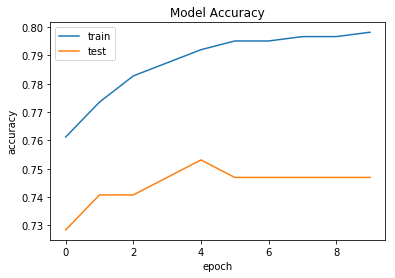

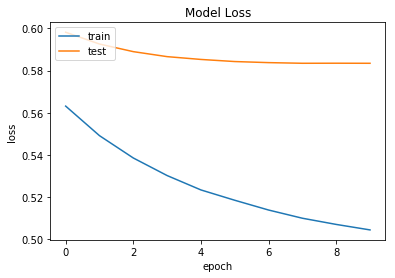

In [135]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

#score = model_lstm.evaluate(X_test, y_test, verbose=3)
#print('Test Loss: ', score[0])
#print('Test Accuracy', score[1])


# list all data in history
print(history_glove2.history.keys())
# summarize history for accuracy
plt.plot(history_glove2.history['acc'])
plt.plot(history_glove2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_glove2.history['loss'])
plt.plot(history_glove2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### GE Model using logisticRegression and BOW

In [149]:
import pandas as pd
new_df=pd.read_json('GE_Earnings_Transcript.json')

In [150]:
new_df.head(5)

,text,sentiment
0,"Good day, ladies and gentlemen and welcome to ...",Neutral
1,I would now like to turn the program over to y...,Neutral
10,Let's start with the outlook because investors...,Neutral
100,"Well Steve, I'd like to think that everything ...",Negative
101,"With respect to Baker Hughes, I mean we talked...",Negative


In [152]:
new_df[new_df['sentiment']=='Neutral']

,text,sentiment
0,"Good day, ladies and gentlemen and welcome to ...",Neutral
1,I would now like to turn the program over to y...,Neutral
10,Let's start with the outlook because investors...,Neutral
103,"Well, Jeff what I was referring to there was t...",Neutral
104,Sorry about that Jeff.,Neutral
105,Thanks.,Neutral
106,"From Barclays, we have Julian Mitchell.",Neutral
114,With respect to Aviation's merger and mix you ...,Neutral
115,We're clearly in conversations with our major ...,Neutral
116,"From Melius Research, we have Scott Davis. Ple...",Neutral


In [154]:
df= new_df[new_df['sentiment']!='Neutral']

In [155]:
df

,text,sentiment
100,"Well Steve, I'd like to think that everything ...",Negative
101,"With respect to Baker Hughes, I mean we talked...",Negative
102,Thanks. And just as a follow-up. I didn't have...,Negative
107,Morning. Maybe as the first question on Power....,Negative
108,"Sure, sure. Let me do that and again this is v...",Negative
109,"Transitioning them, if you will from volume to...",Positive
11,"For the industrial portfolio in total, we will...",Positive
110,"I think when you look at the vintages, we're e...",Positive
111,"As Jamie mentioned, we now take on all the cos...",Positive
112,The other color I would just add there on nega...,Negative


In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

In [159]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [160]:
vectorizer.fit(df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [161]:
a=vectorizer.transform(df['text']).toarray()

In [162]:
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(a, Y, test_size=0.2, random_state=1000)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [167]:
print("Accuracy:", score)

Accuracy: 0.7272727272727273


In [168]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [169]:
input_dim = X_train.shape[1]

In [170]:
model_bow = Sequential()
model_bow.add(Dense(32, input_dim=input_dim, activation='relu'))
model_bow.add(Dropout(0.5))
model_bow.add(Dense(32,activation='relu'))
model_bow.add(Dropout(0.5))
model_bow.add(Dense(1, activation='sigmoid'))

In [171]:
model_bow.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                58656     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 59,745
Trainable params: 59,745
Non-trainable params: 0
_________________________________________________________________


In [172]:
history_bow = model_bow.fit(X_train, y_train,epochs=5,verbose=False,validation_data=(X_test, y_test),batch_size=10)

In [173]:
loss, accuracy = model_bow.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_bow.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

88/88 [==============================] - 0s 136us/step
Training Accuracy: 0.8523
22/22 [==============================] - 0s 140us/step
Testing Accuracy:  0.4545


#### GE using GLoVe

In [174]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

In [175]:
import nltk
import string
import numpy as np
import pandas as pd

In [176]:
from sklearn.manifold import TSNE

In [177]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['text'])

In [178]:
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences, maxlen=50)

In [179]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = Y[indices]
nb_validation_samples = int(0.2 * data.shape[0])

In [180]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [181]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [182]:
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [183]:
from keras.layers import Embedding

embedding_layer = Embedding(num_words,
                            100,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=50,
                            trainable=False)

#### Model 1

In [184]:
sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu',data_format='channels_first')(x)
x = MaxPooling1D(35)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(1, activation='softmax')(x)

model_glove = Model(sequence_input, preds)
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# happy learning!
history_glove=model_glove.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Train on 88 samples, validate on 22 samples
Epoch 1/10
88/88 [==============================] - 4s 49ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 2/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 3/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 4/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 5/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 6/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 7/10
88/88 [==============================] - 0s 1ms/step - loss: 7.6089 - acc: 0.5227 - val_loss: 9.4205 - val_acc: 0.4091
Epoch 8/10
88/88 [===========================

#### Model 2

In [185]:
from keras.optimizers import adam
sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(32, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
#x = Conv1D(64, 5, activation='relu',data_format='channels_first')(x)
#x = MaxPooling1D(5)(x)  # global max pooling
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model_glove1 = Model(sequence_input, preds)
model_glove1.compile(loss='binary_crossentropy',
              optimizer=adam(lr=0.00001),
              metrics=['accuracy'])

# happy learning!
history_glove1=model_glove1.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Train on 88 samples, validate on 22 samples
Epoch 1/10
88/88 [==============================] - 4s 40ms/step - loss: 0.6905 - acc: 0.5568 - val_loss: 0.7382 - val_acc: 0.4091
Epoch 2/10
88/88 [==============================] - 0s 454us/step - loss: 0.6889 - acc: 0.5568 - val_loss: 0.7383 - val_acc: 0.4091
Epoch 3/10
88/88 [==============================] - 0s 432us/step - loss: 0.6876 - acc: 0.5568 - val_loss: 0.7381 - val_acc: 0.4091
Epoch 4/10
88/88 [==============================] - 0s 455us/step - loss: 0.6863 - acc: 0.5682 - val_loss: 0.7379 - val_acc: 0.4091
Epoch 5/10
88/88 [==============================] - 0s 456us/step - loss: 0.6848 - acc: 0.5795 - val_loss: 0.7378 - val_acc: 0.4091
Epoch 6/10
88/88 [==============================] - 0s 466us/step - loss: 0.6835 - acc: 0.5795 - val_loss: 0.7379 - val_acc: 0.4091
Epoch 7/10
88/88 [==============================] - 0s 443us/step - loss: 0.6822 - acc: 0.5795 - val_loss: 0.7378 - val_acc: 0.4091
Epoch 8/10
88/88 [===============